<a href="https://colab.research.google.com/github/har264/Harsha-data-analyst/blob/main/task_2_python_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df = pd.read_excel('/content/DA -Task 2..xlsx')

In [ ]:
print("Data Types:\n", df.dtypes)

Data Types:
 VIN                                      object
TRANSACTION_ID                            int64
CORRECTION_VERBATIM                      object
CUSTOMER_VERBATIM                        object
REPAIR_DATE                      datetime64[ns]
CAUSAL_PART_NM                           object
GLOBAL_LABOR_CODE_DESCRIPTION            object
PLATFORM                                 object
BODY_STYLE                               object
VPPC                                     object
PLANT                                    object
BUILD_COUNTRY                            object
LAST_KNOWN_DLR_NAME                      object
LAST_KNOWN_DLR_CITY                      object
REPAIRING_DEALER_CODE                    object
DEALER_NAME                              object
REPAIR_DLR_CITY                          object
STATE                                    object
DEALER_REGION                             int64
REPAIR_DLR_POSTAL_CD                     object
REPAIR_AGE                 

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD  

In [ ]:
print("\nUnique Values per Column:\n", df.nunique())


Unique Values per Column:
 VIN                               98
TRANSACTION_ID                    32
CORRECTION_VERBATIM               93
CUSTOMER_VERBATIM                100
REPAIR_DATE                       29
CAUSAL_PART_NM                    18
GLOBAL_LABOR_CODE_DESCRIPTION      4
PLATFORM                          11
BODY_STYLE                         6
VPPC                              26
PLANT                             11
BUILD_COUNTRY                      3
LAST_KNOWN_DLR_NAME              100
LAST_KNOWN_DLR_CITY               94
REPAIRING_DEALER_CODE             95
DEALER_NAME                      100
REPAIR_DLR_CITY                   93
STATE                             39
DEALER_REGION                      2
REPAIR_DLR_POSTAL_CD              92
REPAIR_AGE                        35
KM                               100
COMPLAINT_CD_CSI                   1
COMPLAINT_CD                       7
VEH_TEST_GRP                      23
COUNTRY_SALE_ISO                   6
ORD_SELLIN

In [ ]:
df['CAUSAL_PART_NM'] = df['CAUSAL_PART_NM'].fillna('Unknown')

In [ ]:
df['ENGINE'] = df['ENGINE'].fillna('Not Specified')

In [ ]:
df.dropna(subset=['TOTALCOST'], inplace=True)

In [ ]:
df['STATE'] = df['STATE'].str.upper().str.strip()

In [ ]:
df['GLOBAL_LABOR_CODE_DESCRIPTION'] = df['GLOBAL_LABOR_CODE_DESCRIPTION'].str.title()

In [ ]:
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'])

In [ ]:
critical_cols = ['CAUSAL_PART_NM', 'TOTALCOST', 'REPAIR_DATE', 'STATE', 'GLOBAL_LABOR_CODE_DESCRIPTION']

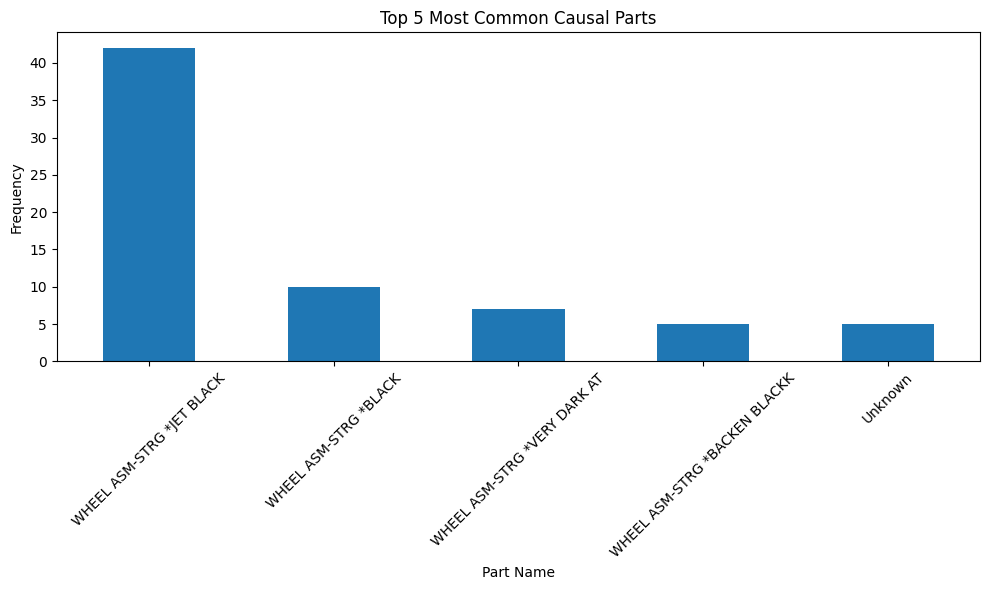

In [ ]:
plt.figure(figsize=(10, 6))
df['CAUSAL_PART_NM'].value_counts().head(5).plot(kind='bar')
plt.title('Top 5 Most Common Causal Parts')
plt.xlabel('Part Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

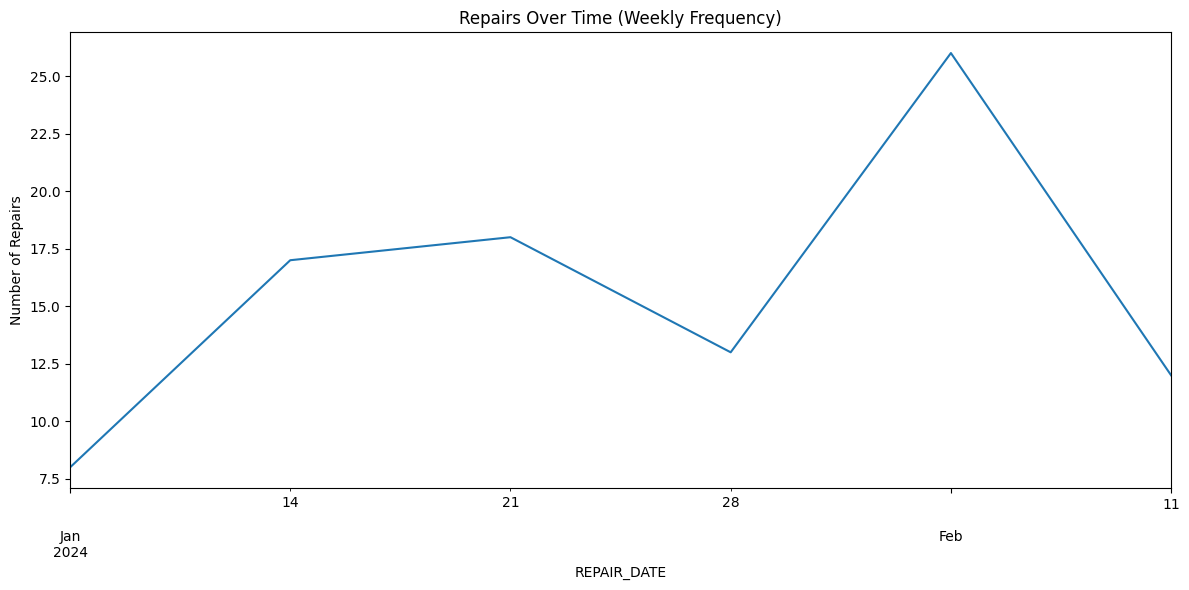

In [ ]:
plt.figure(figsize=(12, 6))
df.set_index('REPAIR_DATE').resample('W').size().plot()
plt.title('Repairs Over Time (Weekly Frequency)')
plt.ylabel('Number of Repairs')
plt.tight_layout()
plt.show()

In [ ]:
def generate_tags(text):
    tags = []
    text = str(text).lower()
    if re.search(r'replace|replaced', text):
        tags.append('Replacement')
    if re.search(r'module', text):
        tags.append('Module Issue')
    if re.search(r'heat|heated', text):
        tags.append('Heating Issue')
    if re.search(r'stitch|loose|peel', text):
        tags.append('Material Defect')
    if re.search(r'program|update', text):
        tags.append('Software/Programming')
    return ', '.join(tags) if tags else 'Other'

In [ ]:
df['TAGS'] = df['CORRECTION_VERBATIM'].apply(generate_tags)

In [ ]:
df.to_csv("Cleaned_Steering_Repairs.csv", index=False)